# **PCA (I)**  
Una aproximación al Análisis de Componentes Principales
 


In [9]:
# Librerías para la preparación de datos
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Librerías para el Modelado
from sklearn.decomposition import PCA

# Librerías para la Visualización 
import matplotlib.pyplot as plt

## Obtención y preparación de los datos  
En primer lugar descargamos el dataset de nuestra elección. En esta ocasión usraemos uno creado a partir de datos provinciales proporcionados por el INE.


In [10]:
file = r'/content/drive/MyDrive/Colab Notebooks/Python/provincias_temas_varios_2.xlsx'
datos = pd.read_excel(file, sheet_name='Datos').set_index('prov')

# Eliminamos variables dicotómicas y nos quedamos con las numéricas
cols_dicot = datos.columns.str.contains('_')
datos = datos.loc[:, ~cols_dicot]

# Limpiamos todas las observaciones que contienen valores perdidos
datos = datos.apply(pd.to_numeric, axis=1, errors='coerce').dropna()

# Visualizamos las primeras filas
datos.head()


,neag,sagt,sagu,benf,acem,acti,ocup,para,ejec,inds,cnst,ctrh,serv,pibc,ipib,inmi,pobl,espa
prov,,,,,,,,,,,,,,,,,,
Almería,22697.0,327346.0,234621.0,38299.166667,4383367.93,341.100,281.025,67.175,2026.0,2135.0,5703.0,18704.0,17550.0,19919.0,0.772923,8013.0,716820.0,570912.0
Cádiz,10069.0,540571.0,424849.0,75581.583333,5611899.98,563.325,423.125,154.950,454.0,2982.0,5916.0,27266.0,27210.0,18050.0,0.700400,6119.0,1240155.0,1194830.0
Córdoba,36641.0,1024515.0,844019.0,62022.833333,9458693.48,370.725,285.175,95.750,193.0,4196.0,5198.0,20196.0,18736.0,18525.0,0.718831,2966.0,782979.0,761876.0
Granada,41243.0,75827.0,625674.0,60393.416667,4635804.67,429.175,333.800,105.625,906.0,3494.0,7240.0,24650.0,26000.0,18181.0,0.705483,6628.0,914678.0,853709.0
Huelva,11952.0,561353.0,32997.0,41255.083333,2639859.60,249.700,194.975,58.925,269.0,1378.0,2682.0,11559.0,10136.0,20273.0,0.786659,3830.0,521870.0,477032.0


En un PCA los datos siempre deben estar centrados. De hecho el estimador ```.PCA()``` que utilizamos lo hace automáticamente. Sin embargo, en muchas ocasiones es interesante o necesario que los datos estén además estandarizados, es decir, divididos por su desviación típica. Todas estas funcionalidades están integradas en los módulos cargados al inicio, en concreto lo logramos con ```StandardScaler()```.  



In [11]:
# Instanciamos el estimador que estandariza los datos
estandarizar = StandardScaler()

# Alimentamos el estimador con los datos
estandarizar.fit(datos)

# Extraemos los nuevos datos transformados con media 0 y varianza 1
datos_std = estandarizar.transform(datos)

# Comprobamos que los datos están centrados y estandarizados
pd.DataFrame(datos_std, columns=datos.columns).describe().round(1).iloc[1:3, :]

,neag,sagt,sagu,benf,acem,acti,ocup,para,ejec,inds,cnst,ctrh,serv,pibc,ipib,inmi,pobl,espa
mean,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Construcción del análisis  
Para la realización del anális de Componentes principales podríamos realizar las operaciones matemáticas o podemos utilizar librerías que realizan ese trabajo por nosotros. Este segundo método es el que utilizaremos en el ejemplo.  


In [12]:
# Creamos un estimador de componentes principales
pca = PCA()

# Introducimos nuestros datos en el estimador
modelo = pca.fit(datos_std)

Una vez creado nuestro modelo podemos comenzar a extraer la información que nos interesa. Por ejemplo, los vectores que definen la dirección de cada Componente Principal y que se corresponden con los vectores propios de la matriz de covarianzas de los datos se obtienen de la siguiente manera: 

In [17]:
# vectores propios
vect_props = modelo.components_

# Muestra de los tres primeros vectores propios
pd.DataFrame(vect_props.round(3), columns=datos.columns).head(3)

,neag,sagt,sagu,benf,acem,acti,ocup,para,ejec,inds,cnst,ctrh,serv,pibc,ipib,inmi,pobl,espa
0,0.011,-0.092,-0.064,0.260,0.271,0.285,0.284,0.270,0.201,0.277,0.282,0.285,0.282,0.087,0.087,0.279,0.285,0.284
1,-0.439,-0.388,-0.348,-0.173,-0.063,-0.013,0.002,-0.123,-0.130,-0.033,0.018,-0.026,0.016,0.482,0.482,0.037,-0.022,-0.031
2,-0.030,0.521,0.605,-0.099,0.128,0.032,0.047,-0.080,-0.225,0.040,0.026,0.002,0.067,0.365,0.365,0.028,0.022,0.026


Podemos visibilizar las puntuaciones o _scores_. Estas se corresponden con las coordenadas de cada observación sobre los factores (o componentes principales extraídos). Por ejemplo, si extraemos 2 componentes principales y visualizamos una muestra de las _scores_ de las tres primeras observaciones (provincias) de nuestro dataset:

In [14]:
scores = pca.transform(datos_std)

# Visualizamos la muestra de puntuaciones
pd.DataFrame(scores).set_index(pd.Index(datos.index), 'Provincia').iloc[:3, :2]

,0,1
prov,,
Almería,-0.288568,-0.803073
Cádiz,0.284971,-1.245094
Córdoba,-0.663540,-2.606698


Como el objetivo de un PCA es maximizar la cantidad de varianza explicada por los componentes extraídos. Podemos extraer información sobre las varianzas total explicada por cada una de las componentes o factores. Estas varianzas se corresponden con los valores propios de la matriz de covarianzas de los datos estandarizados.  
En el gráfico de más abajo podemos ver que extrayendo dos componentes principales o factores podemos explicar algo más del 80% de la varianza de los datos originales. 

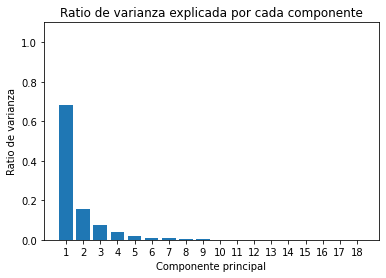

In [15]:
# Porcentaje de la varianza total de los datos explicada por cada factor o componente principal
varianzas_ratio_comp = modelo.explained_variance_ratio_

# Número de componentes principales o factores que pueden ser extraídos
n_comp = modelo.n_components_

# Visualizamos los porcentajes de varianza explicados
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(n_comp) + 1,
    height = varianzas_ratio_comp
)
ax.set_xticks(np.arange(n_comp) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Ratio de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Ratio de varianza');


Una buena forma de interpretar nuestros datos a través de las componentes extraídas es utilizar un gráfico biplot que representa los ejes (variables) originales proyectados sobre las componentes extraídas (en este caso PC1 y PC2). Además en este gráfico se representan los datos originales también proyectados sobre las componentes principales. A los _scores_ suele ser necesario aplicar un factor de escalado para poder visualizarlo junto con los ejes originales que son vectores de módulo 1.

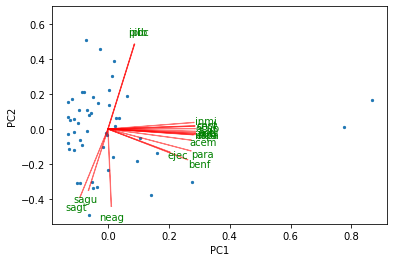

In [16]:
# coordenadas de los datos originales sobre PC1 y PC2
pc1s = scores[:,0]
pc2s = scores[:,1]

# vectores directores de los ejes originales proyectados sobre PC1 y PC2
ejes_orig = np.transpose(modelo.components_[:2, :])

#numero de ejes del dataset original
n = ejes_orig.shape[0]

#nombres de los ejes (variables) originales
etiquetas = list(datos.columns)

# factor de escalado de los scores
escalado_1 = pc1s.max() - pc1s.min()
escalado_2 = pc2s.max() - pc2s.min()

plt.scatter(pc1s / escalado_1, pc2s / escalado_2, s=5)
for i in range(n):
  plt.arrow(0, 0, ejes_orig[i,0], ejes_orig[i,1],color = 'r',alpha = 0.5)
  plt.text(ejes_orig[i,0]* 1.15, ejes_orig[i,1] * 1.15, etiquetas[i], color = 'g', ha = 'center', va = 'center')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.ylim(top=0.7);